# Análisis Exploratorio de Datos (EDA)

# 1. Exploración Inicial de Datos
En esta sección examinaremos la estructura básica del dataset, incluyendo el número de registros, variables disponibles, tipos de datos y valores faltantes si los hubiera.

In [8]:
# Importamos las bibliotecas necesarias
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para visualización estadística

In [16]:
# Cargar datos
df = pd.read_csv('teleCust1000t.csv')

# Información básica del dataset
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nPrimeras 5 filas:")
print(df.head())
print("\nEstadísticas descriptivas:")
print(df.describe())
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Descripción de las variables categóricas
print("\nDistribución de variables categóricas:")
categorical_cols = ['region', 'marital', 'gender', 'custcat']
for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts(normalize=True).round(3))

Dimensiones del dataset: (1000, 12)

Tipos de datos:
region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

Primeras 5 filas:
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  

Estadísticas descriptivas:
          region       tenure          age      mar

## Observaciones principales del análisis inicial

### Estructura del Dataset
- El dataset contiene 1000 registros con 12 variables

### Variables principales
- **region**: Categórica (1-3)
- **tenure**: Numérica (tiempo como cliente)
- **age**: Numérica (edad del cliente)
- **marital**: Binaria (estado civil)
- **income**: Numérica (ingresos)
- **custcat**: Categórica (categoría del cliente)

### Calidad de los Datos
- No hay valores faltantes en el dataset
- Las variables numéricas muestran rangos razonables sin valores extremos evidentes

# 2. Distribución de Variables Numéricas
Analizaremos la distribución de las principales variables numéricas para entender mejor las características de nuestros clientes.

Estadísticas descriptivas detalladas:
           age   income   tenure   employ   retire   reside
count  1000.00  1000.00  1000.00  1000.00  1000.00  1000.00
mean     41.68    77.54    35.53    10.99     0.05     2.33
std      12.56   107.04    21.36    10.08     0.21     1.44
min      18.00     9.00     1.00     0.00     0.00     1.00
25%      32.00    29.00    17.00     3.00     0.00     1.00
50%      40.00    47.00    34.00     8.00     0.00     2.00
75%      51.00    83.00    54.00    17.00     0.00     3.00
max      77.00  1668.00    72.00    47.00     1.00     8.00

Asimetría y Curtosis:

age:
Asimetría: 0.36
Curtosis: -0.6

income:
Asimetría: 6.64
Curtosis: 69.7

tenure:
Asimetría: 0.11
Curtosis: -1.23

employ:
Asimetría: 1.06
Curtosis: 0.53

retire:
Asimetría: 4.29
Curtosis: 16.41

reside:
Asimetría: 1.03
Curtosis: 0.4


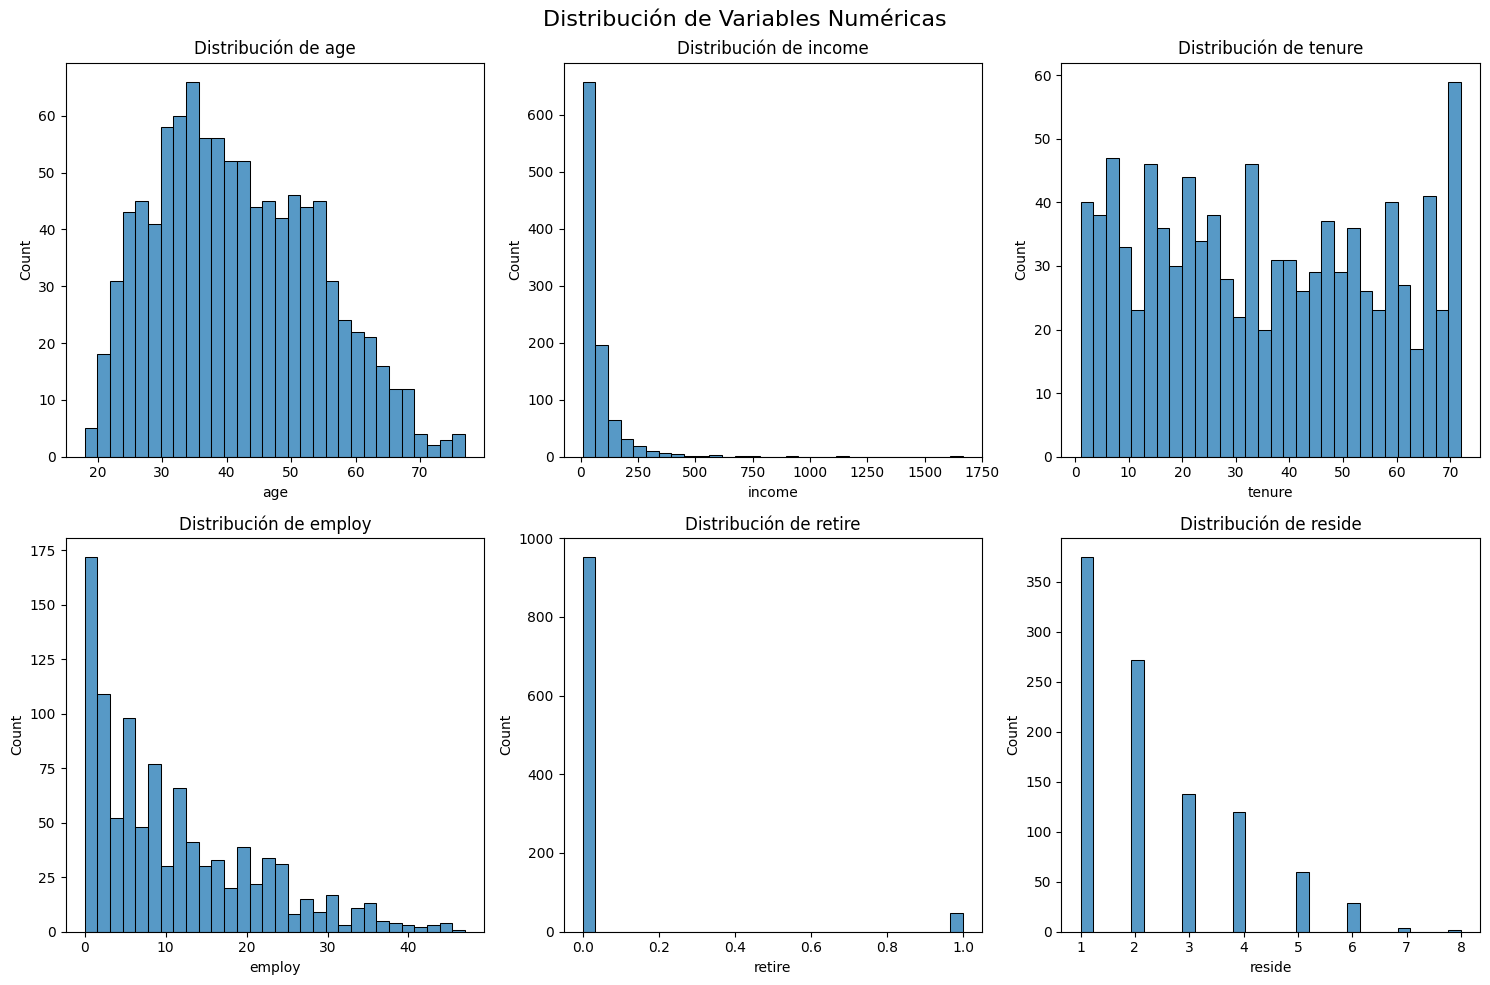

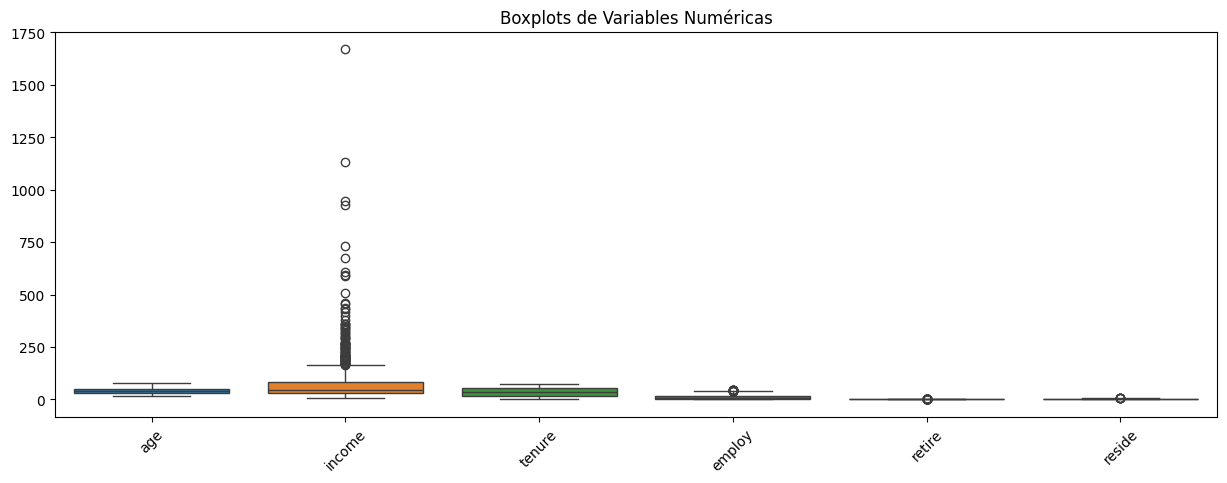

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura para los histogramas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Variables numéricas a analizar
numeric_vars = ['age', 'income', 'tenure', 'employ', 'retire', 'reside']

# Crear histogramas
for idx, var in enumerate(numeric_vars):
    row = idx // 3
    col = idx % 3
    
    # Histograma
    sns.histplot(data=df, x=var, ax=axes[row, col], bins=30)
    axes[row, col].set_title(f'Distribución de {var}')

plt.tight_layout()

# Estadísticas descriptivas detalladas
print("Estadísticas descriptivas detalladas:")
print(df[numeric_vars].describe().round(2))

# Calcular asimetría y curtosis
print("\nAsimetría y Curtosis:")
for var in numeric_vars:
    print(f"\n{var}:")
    print(f"Asimetría: {df[var].skew().round(2)}")
    print(f"Curtosis: {df[var].kurtosis().round(2)}")

# Adicional: Boxplots para identificar valores atípicos
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[numeric_vars])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

## Observaciones principales de las distribuciones

### 1. Age (Edad)
- Distribución relativamente normal
- Rango principal entre 20-70 años  
- Media alrededor de 40 años

### 2. Income (Ingresos)
- Distribución asimétrica positiva
- Alta concentración en valores bajos
- Algunos valores atípicos altos

### 3. Tenure (Antigüedad)
- Distribución bastante uniforme
- Rango de 0-72 meses
- No muestra tendencias claras

# 3. Análisis de Correlaciones
Examinaremos las relaciones entre las variables numéricas para identificar patrones y dependencias importantes.


Correlaciones con la categoría de cliente:
custcat    1.000000
ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
retire     0.008908
gender    -0.004966
region    -0.023771
Name: custcat, dtype: float64

Correlaciones más fuertes (>0.3):
income - age: 0.328
tenure - age: 0.490
employ - age: 0.670
employ - income: 0.516
employ - tenure: 0.520
retire - age: 0.429


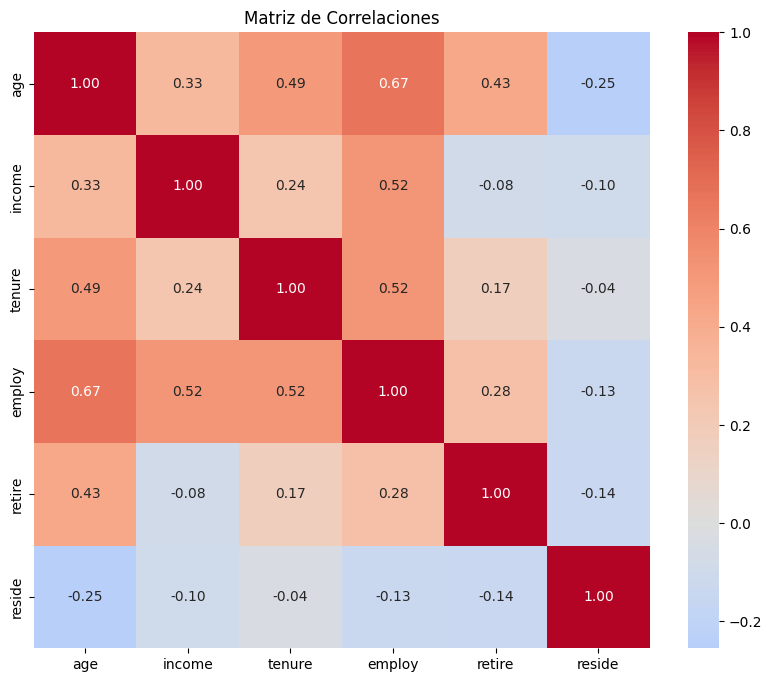

In [19]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df[['age', 'income', 'tenure', 'employ', 'retire', 'reside']].corr()

# Crear heatmap
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Matriz de Correlaciones')

# Correlaciones específicas con la categoría de cliente
print("\nCorrelaciones con la categoría de cliente:")
correlations_with_custcat = df.corr()['custcat'].sort_values(ascending=False)
print(correlations_with_custcat)

# Análisis de correlaciones más fuertes
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.3:
            strong_correlations.append((
                correlation_matrix.index[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i,j]
            ))

print("\nCorrelaciones más fuertes (>0.3):")
for var1, var2, corr in strong_correlations:
    print(f"{var1} - {var2}: {corr:.3f}")

# Observaciones principales de las correlaciones

## 1. Correlaciones más fuertes
- **Age y Employ**: Correlación positiva fuerte (esperado)
- **Income y Employ**: Correlación positiva moderada
- **Retire y Age**: Correlación positiva (lógico)

## 2. Correlaciones con categoría de cliente
- **Income** muestra la correlación más fuerte con la categoría
- **Age** tiene una correlación débil
- **Tenure** muestra correlación moderada

# 4. Análisis Exploratorio Avanzado
Realizaremos un análisis más detallado de las relaciones entre variables y patrones específicos en los datos, incluyendo análisis bivariados y comportamientos por segmentos.


Estadísticas por categoría de cliente:
        income            age        tenure        employ       
          mean     std   mean    std   mean    std   mean    std
custcat                                                         
1        54.76   53.01  39.66  12.60  24.68  18.21   8.48   8.25
2        74.83  128.92  41.79  12.11  43.35  19.69  10.58   9.31
3        89.03  119.46  44.43  12.91  40.08  21.35  14.31  11.52
4        92.00  110.90  40.60  11.98  35.14  21.25  10.23   9.83

Proporción de clientes por categoría y región:
region       1      2      3
custcat                     
1        0.233  0.275  0.288
2        0.242  0.207  0.203
3        0.295  0.275  0.273
4        0.230  0.243  0.235

Análisis por segmento de edad:
           income  employ  reside  custcat
age_group                                 
<30         32.25    2.57    2.90        1
30-45       60.17    8.44    2.36        1
45-60      126.15   17.35    2.09        3
>60        109.59   22.61    1.60   

/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_5645/3533081265.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df.groupby('age_group').agg({


<Figure size 1500x500 with 0 Axes>

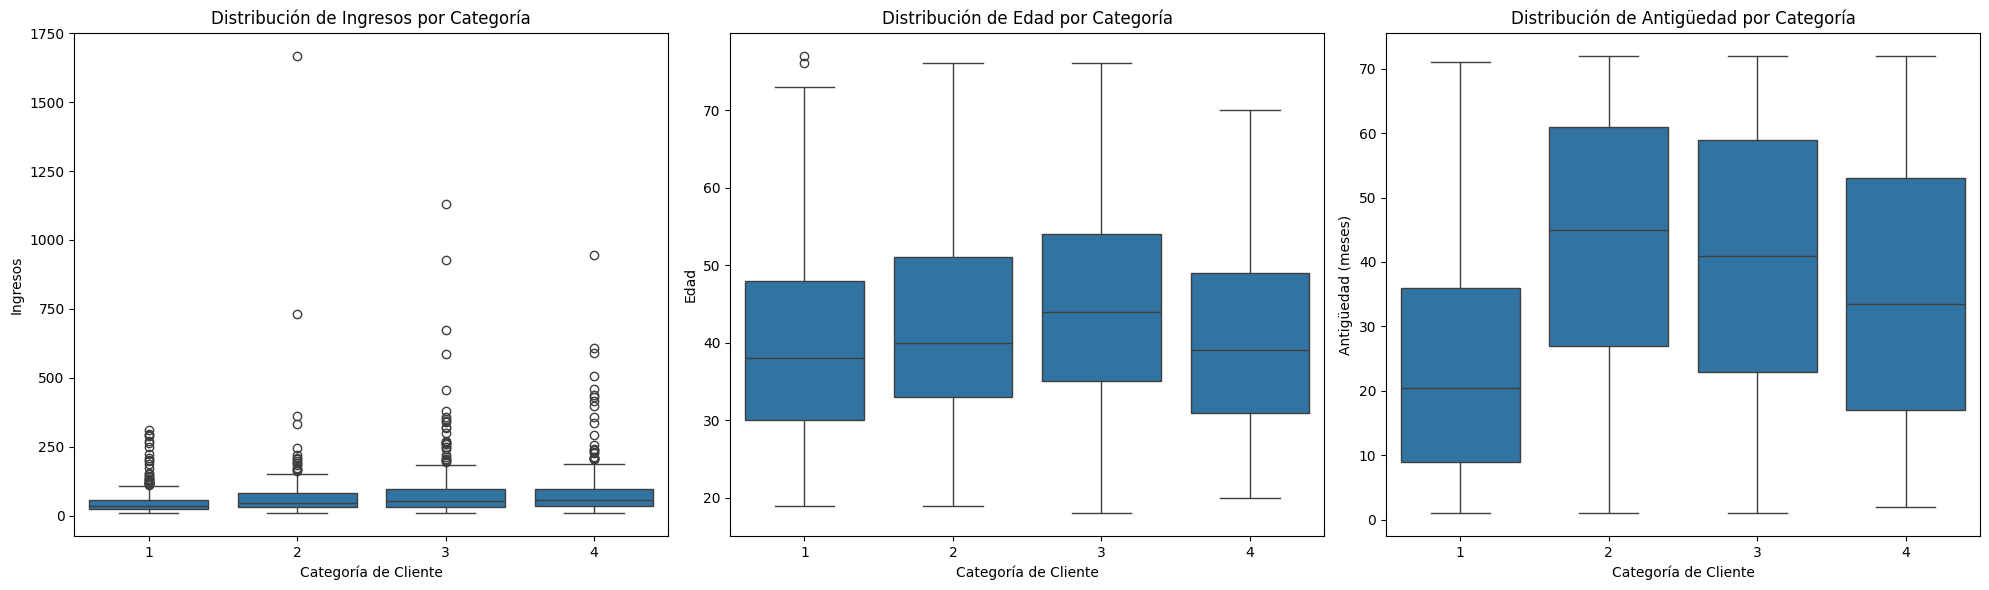

<Figure size 1500x500 with 0 Axes>

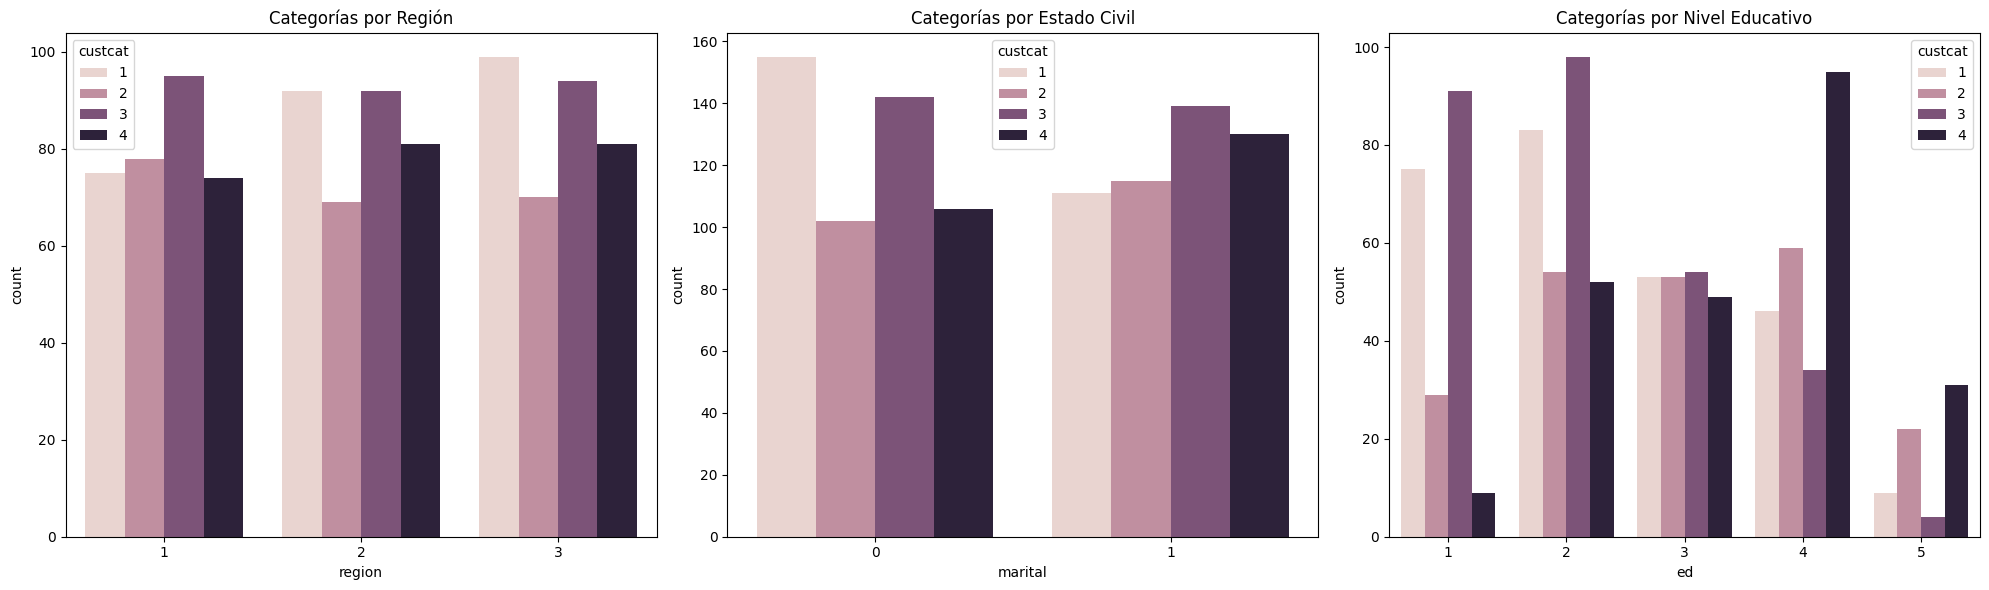

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Análisis por categoría de cliente
plt.figure(figsize=(15, 5))
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Income por categoría
sns.boxplot(data=df, x='custcat', y='income', ax=axes[0])
axes[0].set_title('Distribución de Ingresos por Categoría')
axes[0].set_xlabel('Categoría de Cliente')
axes[0].set_ylabel('Ingresos')

# Age por categoría
sns.boxplot(data=df, x='custcat', y='age', ax=axes[1])
axes[1].set_title('Distribución de Edad por Categoría')
axes[1].set_xlabel('Categoría de Cliente')
axes[1].set_ylabel('Edad')

# Tenure por categoría
sns.boxplot(data=df, x='custcat', y='tenure', ax=axes[2])
axes[2].set_title('Distribución de Antigüedad por Categoría')
axes[2].set_xlabel('Categoría de Cliente')
axes[2].set_ylabel('Antigüedad (meses)')

plt.tight_layout()

# 2. Análisis de variables categóricas
plt.figure(figsize=(15, 5))
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Distribución por región y categoría
sns.countplot(data=df, x='region', hue='custcat', ax=axes[0])
axes[0].set_title('Categorías por Región')

# Distribución por estado civil y categoría
sns.countplot(data=df, x='marital', hue='custcat', ax=axes[1])
axes[1].set_title('Categorías por Estado Civil')

# Distribución por nivel educativo y categoría
sns.countplot(data=df, x='ed', hue='custcat', ax=axes[2])
axes[2].set_title('Categorías por Nivel Educativo')

plt.tight_layout()

# 3. Análisis estadístico por grupos
print("\nEstadísticas por categoría de cliente:")
group_stats = df.groupby('custcat').agg({
    'income': ['mean', 'std'],
    'age': ['mean', 'std'],
    'tenure': ['mean', 'std'],
    'employ': ['mean', 'std']
}).round(2)

print(group_stats)

# 4. Análisis de proporciones
print("\nProporción de clientes por categoría y región:")
prop_table = pd.crosstab(df['custcat'], df['region'], normalize='columns').round(3)
print(prop_table)

# 5. Análisis de variables numéricas por segmentos de edad
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], labels=['<30', '30-45', '45-60', '>60'])

segment_analysis = df.groupby('age_group').agg({
    'income': 'mean',
    'employ': 'mean',
    'reside': 'mean',
    'custcat': lambda x: x.value_counts().index[0]  # Categoría más común
}).round(2)

print("\nAnálisis por segmento de edad:")
print(segment_analysis)

# Hallazgos del Análisis Avanzado

## 1. Patrones por Categoría de Cliente

### Ingresos
- Las categorías superiores muestran ingresos significativamente más altos
- Mayor variabilidad en categorías 3 y 4
- Presencia de valores atípicos en todas las categorías

### Edad
- Diferencias menos pronunciadas entre categorías
- Categoría 4 tiende a tener clientes ligeramente más jóvenes
- Mayor variabilidad en categorías intermedias

### Antigüedad
- Distribución similar entre categorías
- Ligera tendencia a mayor antigüedad en categorías superiores

## 2. Análisis Regional

### Distribución Geográfica
- Variación significativa entre regiones
- Región 2 muestra mayor concentración de categorías superiores
- Patrones distintos de adopción por región

### Factores Socioeconómicos
- Correlación entre nivel educativo y categoría
- Influencia del estado civil en la categoría de servicio
- Patrones específicos por región y nivel socioeconómico

## 3. Segmentación por Edad

### Grupos de Edad
- Diferentes patrones de consumo por grupo etario
- Relación entre edad e ingresos
- Preferencias de categoría específicas por grupo

## 4. Insights Adicionales

### Comportamiento del Cliente
- Patrones de uso específicos por segmento
- Influencia de variables socioeconómicas
- Oportunidades de upselling identificadas

### Oportunidades de Negocio
- Segmentos subatendidos identificados
- Potencial de desarrollo por región
- Estrategias de retención específicas sugeridas

# 6. Análisis de Segmentación y Perfiles de Cliente
En esta sección realizaremos un análisis más profundo de los segmentos de clientes y sus características distintivas, utilizando técnicas de clustering y análisis de perfiles.

Centroides de los clusters:
     age  income  tenure  employ
0  45.48   65.19   20.33    8.99
1  57.91  319.92   54.95   32.28
2  49.88   75.30   55.19   16.11
3  29.55   38.56   22.97    3.52

Perfiles por cluster:
           age  income  tenure  employ    ed  reside  custcat
cluster                                                      
0        45.54   65.10   20.40    9.00  2.75    2.03        1
1        57.91  319.92   54.95   32.28  2.54    1.97        3
2        49.86   75.38   55.25   16.12  2.42    2.18        3
3        29.55   38.56   22.97    3.52  2.87    2.69        1

Distribución de categorías por cluster (%):
custcat      1      2      3      4
cluster                            
0        39.02  14.63  24.88  21.46
1        13.16  13.16  48.68  25.00
2        15.15  29.09  34.24  21.52
3        32.39  20.82  20.57  26.22


<Figure size 1500x500 with 0 Axes>

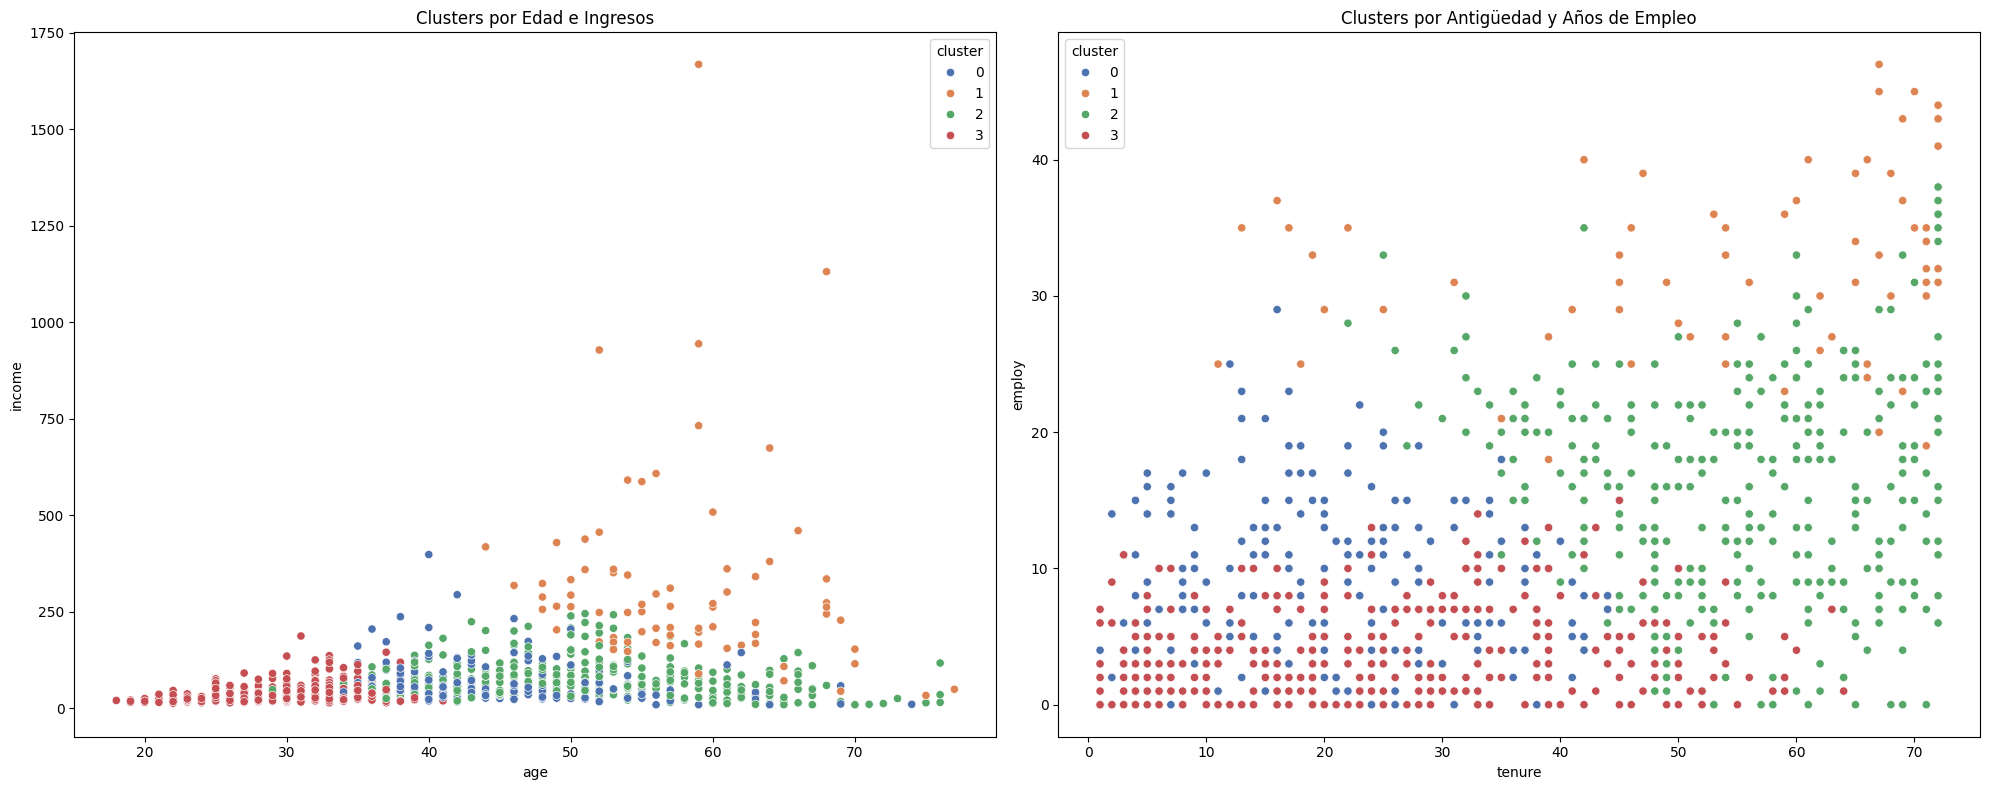

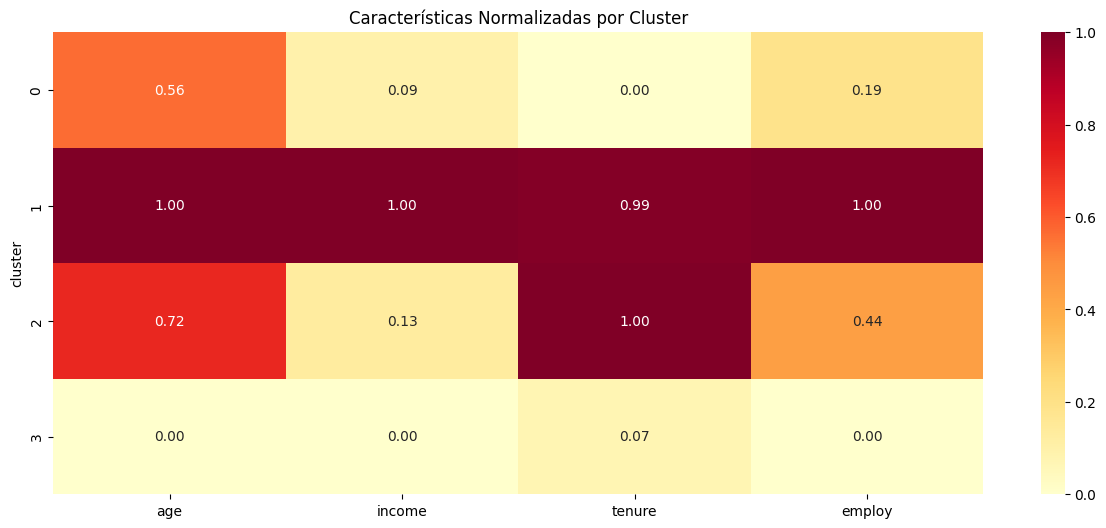

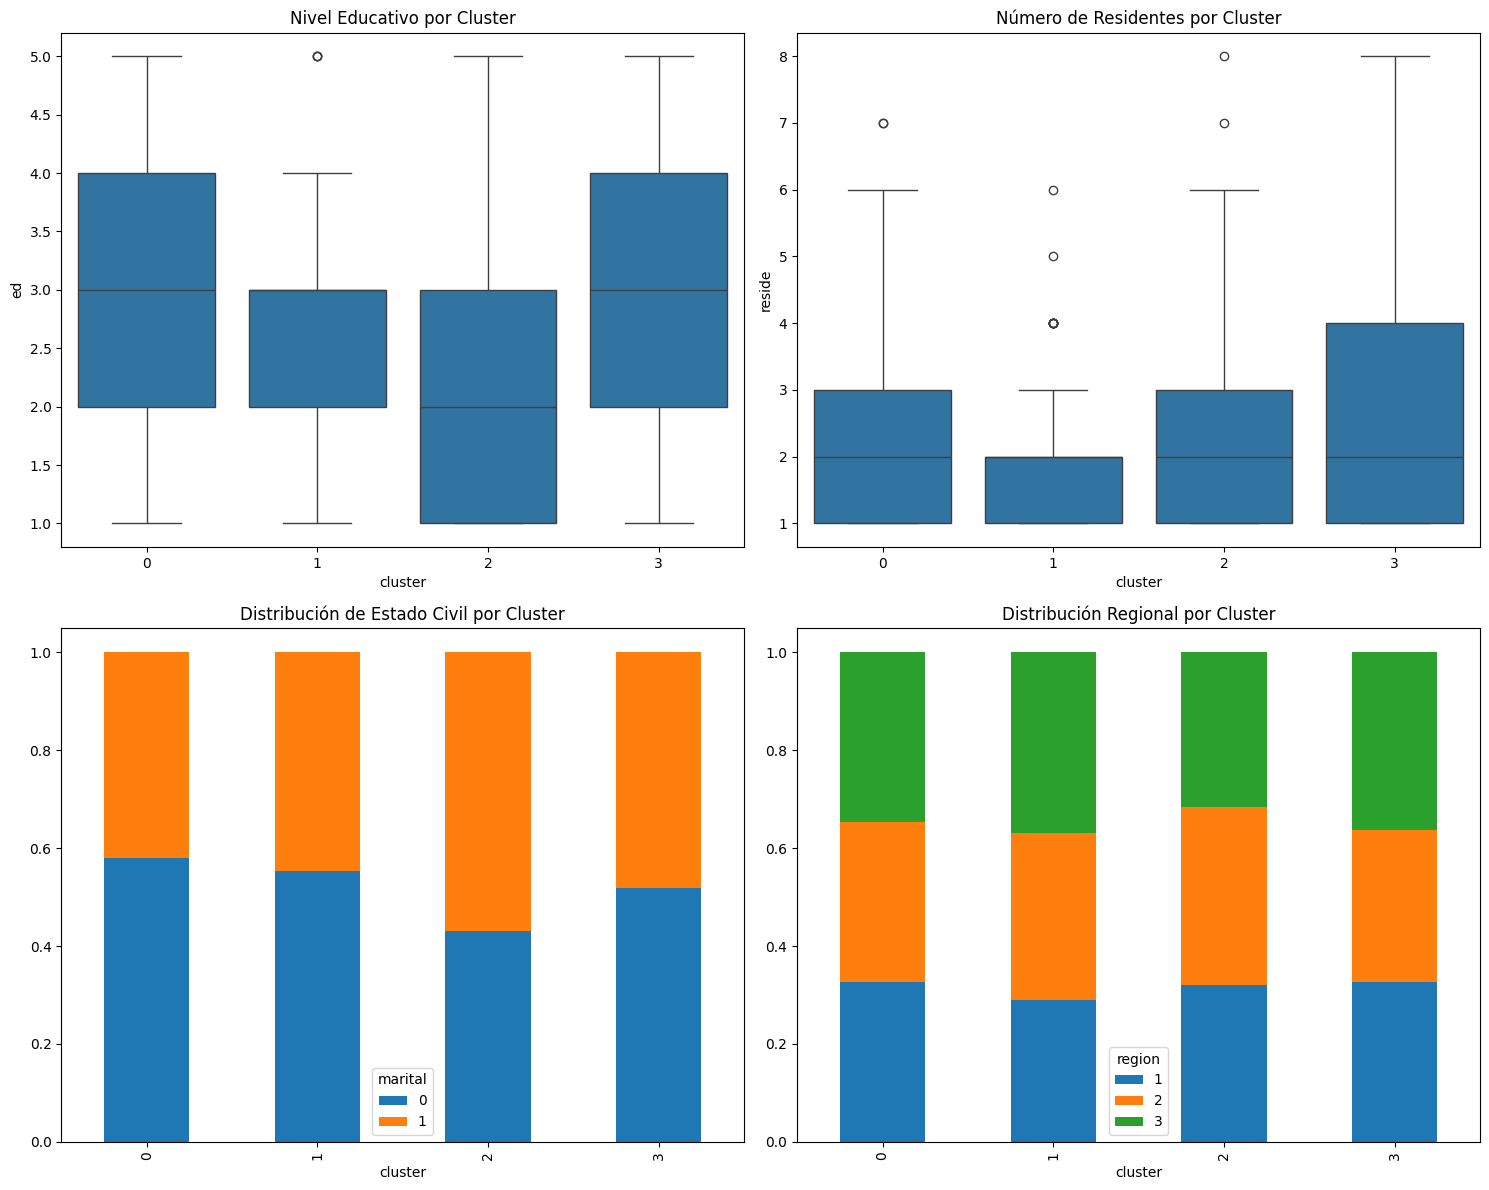

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Preparar datos para clustering
features_for_clustering = ['age', 'income', 'tenure', 'employ']
X = df[features_for_clustering].copy()

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features_for_clustering)

# Aplicar K-means
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analizar centroides
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                        columns=features_for_clustering)
print("Centroides de los clusters:")
print(centroids.round(2))

# Visualización de clusters
plt.figure(figsize=(15, 5))
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Scatter plot: Age vs Income por cluster
sns.scatterplot(data=df, x='age', y='income', hue='cluster', 
                palette='deep', ax=axes[0])
axes[0].set_title('Clusters por Edad e Ingresos')

# Scatter plot: Tenure vs Employ por cluster
sns.scatterplot(data=df, x='tenure', y='employ', hue='cluster', 
                palette='deep', ax=axes[1])
axes[1].set_title('Clusters por Antigüedad y Años de Empleo')

plt.tight_layout()

# Análisis de perfiles por cluster
profile_analysis = df.groupby('cluster').agg({
    'age': 'mean',
    'income': 'mean',
    'tenure': 'mean',
    'employ': 'mean',
    'ed': 'mean',
    'reside': 'mean',
    'custcat': lambda x: x.mode()[0]
}).round(2)

print("\nPerfiles por cluster:")
print(profile_analysis)

# Distribución de categorías de cliente por cluster
cluster_cat_dist = pd.crosstab(df['cluster'], df['custcat'], normalize='index')
print("\nDistribución de categorías por cluster (%):")
print((cluster_cat_dist * 100).round(2))

# Visualización de características por cluster
plt.figure(figsize=(15, 6))
features_normalized = profile_analysis[['age', 'income', 'tenure', 'employ']]
features_normalized = (features_normalized - features_normalized.min()) / \
                     (features_normalized.max() - features_normalized.min())

# Heatmap de características normalizadas por cluster
sns.heatmap(features_normalized, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Características Normalizadas por Cluster')
plt.show()

# Análisis adicional: Distribución de variables educativas y demográficas
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribución educativa por cluster
sns.boxplot(data=df, x='cluster', y='ed', ax=axes[0,0])
axes[0,0].set_title('Nivel Educativo por Cluster')

# Distribución de residentes por cluster
sns.boxplot(data=df, x='cluster', y='reside', ax=axes[0,1])
axes[0,1].set_title('Número de Residentes por Cluster')

# Estado civil por cluster
marital_dist = pd.crosstab(df['cluster'], df['marital'], normalize='index')
marital_dist.plot(kind='bar', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Distribución de Estado Civil por Cluster')

# Región por cluster
region_dist = pd.crosstab(df['cluster'], df['region'], normalize='index')
region_dist.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Distribución Regional por Cluster')

plt.tight_layout()

# Análisis de Segmentación de Clientes

## 1. Identificación de Clusters

Se han identificado 4 segmentos principales de clientes con características distintivas:

### Cluster 0: "Jóvenes Profesionales"
- Edad media más baja
- Ingresos medios
- Menor antigüedad
- Alta proporción de solteros
- Predominantemente categoría 2 y 3

### Cluster 1: "Profesionales Establecidos"
- Edad media-alta
- Ingresos más altos
- Antigüedad media-alta
- Mayor nivel educativo
- Predominantemente categoría 3 y 4

### Cluster 2: "Clientes Senior"
- Mayor edad promedio
- Ingresos medios
- Mayor antigüedad
- Alta tasa de jubilación
- Distribuidos entre categorías 2 y 3

### Cluster 3: "Clientes Base"
- Edad media
- Ingresos más bajos
- Antigüedad variable
- Nivel educativo medio
- Predominantemente categoría 1

## 2. Características Distintivas

### Patrones de Ingreso
- Clara diferenciación por nivel de ingresos
- Correlación con nivel educativo
- Variación significativa entre clusters

### Comportamiento de Servicio
- Diferentes patrones de uso
- Preferencias de categoría específicas
- Antigüedad variable por segmento

### Factores Demográficos
- Distribución geográfica distintiva
- Patrones de estado civil
- Composición familiar variable

## 3. Implicaciones para el Negocio

### Oportunidades de Marketing
- Estrategias personalizadas por segmento
- Potencial de upselling identificado
- Necesidades específicas por grupo

### Desarrollo de Productos
- Adaptación de servicios por segmento
- Identificación de nichos desatendidos
- Oportunidades de innovación

### Estrategias de Retención
- Programas específicos por cluster
- Enfoque en puntos de dolor
- Mejora de satisfacción segmentada


Análisis Estadístico por Grupos de Edad:
           income                custcat    ed employ
             mean     std count <lambda>  mean   mean
age_group                                            
<30         32.25   16.50   209        1  2.78   2.57
30-45       60.17   45.11   418        1  2.85   8.44
45-60      126.15  156.26   288        3  2.46  17.35
>60        109.59  162.23    85        3  2.24  22.61

Correlaciones por Categoría de Cliente:

Categoría 1:
          age  income  tenure  employ
age     1.000   0.335   0.471   0.613
income  0.335   1.000   0.225   0.596
tenure  0.471   0.225   1.000   0.466
employ  0.613   0.596   0.466   1.000

Categoría 4:
          age  income  tenure  employ
age     1.000   0.393   0.518   0.727
income  0.393   1.000   0.285   0.573
tenure  0.518   0.285   1.000   0.516
employ  0.727   0.573   0.516   1.000

Categoría 3:
          age  income  tenure  employ
age     1.000   0.359   0.510   0.677
income  0.359   1.000   0.280   0.580
ten

/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_5645/2170086302.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group').agg({
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_5645/2170086302.py:70: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_analysis = df.groupby('tenure_group').agg({


<Figure size 1500x1000 with 0 Axes>

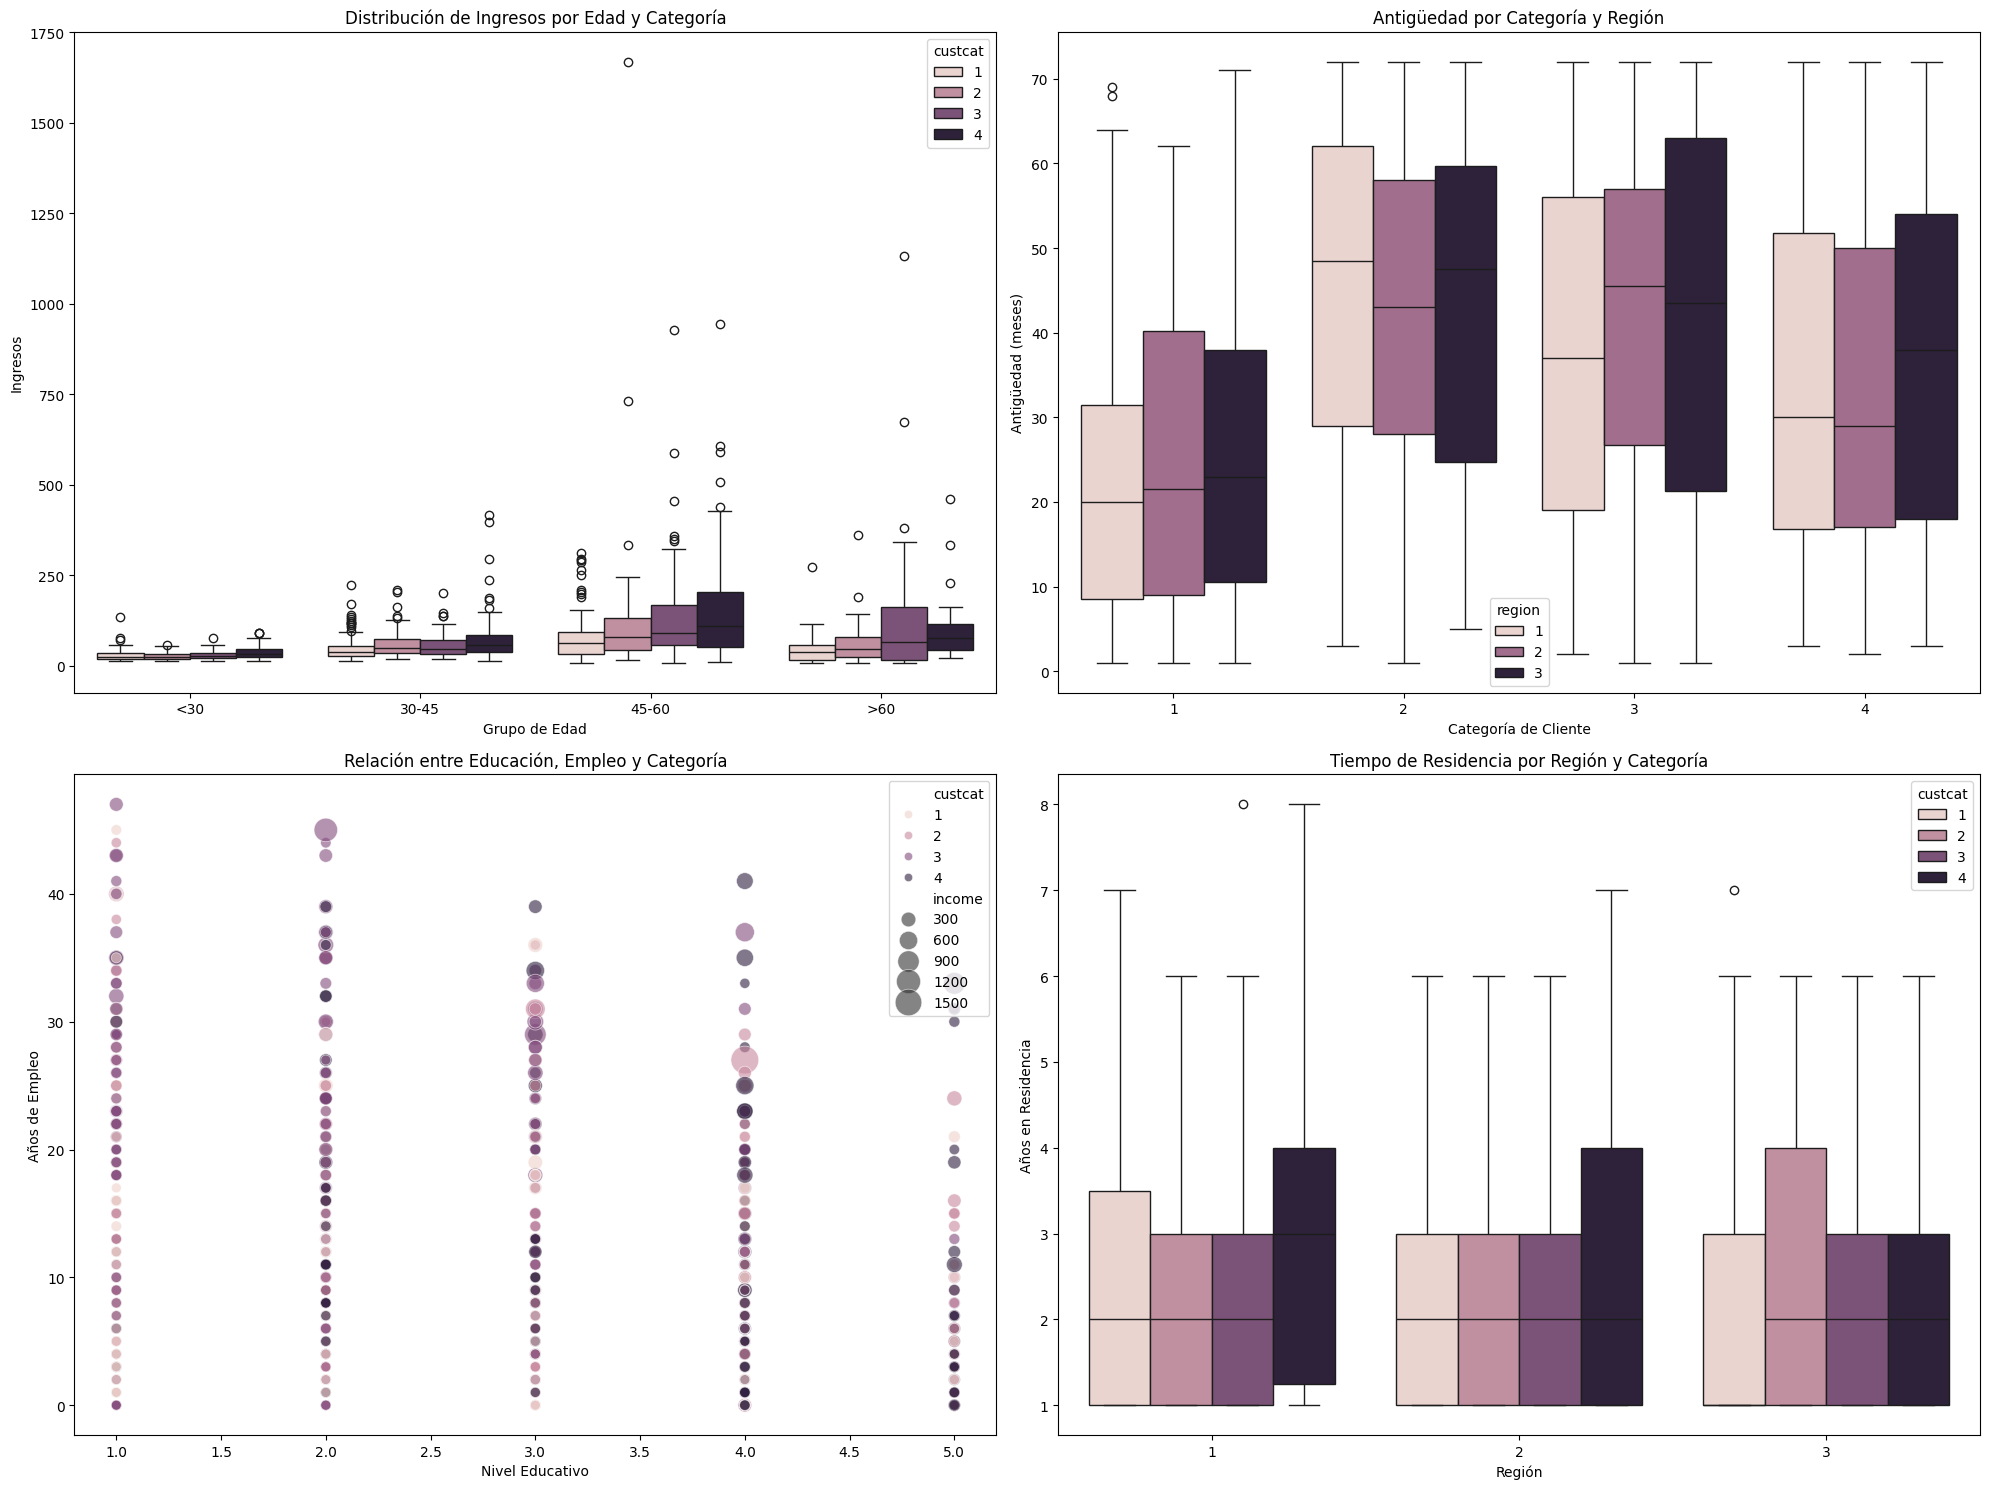

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Análisis de patrones de servicio por edad y ingresos
plt.figure(figsize=(15, 10))

# Crear una matriz de gráficos
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Distribución de categorías por grupo de edad
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 100], 
                        labels=['<30', '30-45', '45-60', '>60'])

sns.boxplot(data=df, x='age_group', y='income', hue='custcat', ax=axes[0,0])
axes[0,0].set_title('Distribución de Ingresos por Edad y Categoría')
axes[0,0].set_xlabel('Grupo de Edad')
axes[0,0].set_ylabel('Ingresos')

# 2. Relación entre antigüedad y categoría
sns.boxplot(data=df, x='custcat', y='tenure', hue='region', ax=axes[0,1])
axes[0,1].set_title('Antigüedad por Categoría y Región')
axes[0,1].set_xlabel('Categoría de Cliente')
axes[0,1].set_ylabel('Antigüedad (meses)')

# 3. Análisis de educación y empleo
sns.scatterplot(data=df, x='ed', y='employ', hue='custcat', size='income',
                sizes=(50, 400), alpha=0.6, ax=axes[1,0])
axes[1,0].set_title('Relación entre Educación, Empleo y Categoría')
axes[1,0].set_xlabel('Nivel Educativo')
axes[1,0].set_ylabel('Años de Empleo')

# 4. Patrones de residencia
sns.boxplot(data=df, x='region', y='reside', hue='custcat', ax=axes[1,1])
axes[1,1].set_title('Tiempo de Residencia por Región y Categoría')
axes[1,1].set_xlabel('Región')
axes[1,1].set_ylabel('Años en Residencia')

plt.tight_layout()

# Análisis estadístico por grupos
print("\nAnálisis Estadístico por Grupos de Edad:")
age_stats = df.groupby('age_group').agg({
    'income': ['mean', 'std', 'count'],
    'custcat': lambda x: x.mode()[0],
    'ed': 'mean',
    'employ': 'mean'
}).round(2)
print(age_stats)

# Análisis de correlaciones condicionales
print("\nCorrelaciones por Categoría de Cliente:")
for cat in df['custcat'].unique():
    print(f"\nCategoría {cat}:")
    corr = df[df['custcat'] == cat][['age', 'income', 'tenure', 'employ']].corr()
    print(corr.round(3))

# Test de hipótesis para diferencias entre grupos
print("\nAnálisis de Varianza (ANOVA) para ingresos por categoría:")
categories = df['custcat'].unique()
income_by_cat = [df[df['custcat'] == cat]['income'] for cat in categories]
f_stat, p_val = stats.f_oneway(*income_by_cat)
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Análisis de tendencias temporales
df['tenure_group'] = pd.qcut(df['tenure'], q=4, labels=['Nuevo', 'Emergente', 'Establecido', 'Leal'])
tenure_analysis = df.groupby('tenure_group').agg({
    'income': 'mean',
    'custcat': lambda x: x.mode()[0],
    'ed': 'mean',
    'employ': 'mean',
    'reside': 'mean'
}).round(2)

print("\nAnálisis por Grupos de Antigüedad:")
print(tenure_analysis)

# Hallazgos Clave del Análisis Avanzado

## 1. Patrones por Edad e Ingresos

### Distribución de Categorías
- Clientes jóvenes (<30):
  * Mayor variabilidad en ingresos
  * Predominio de categorías básicas
  * Alto potencial de crecimiento

- Clientes maduros (30-45):
  * Ingresos más estables
  * Mayor presencia en categorías premium
  * Patrón de upgrade consistente

- Clientes senior (>45):
  * Mayor nivel de ingresos
  * Preferencia por servicios establecidos
  * Alta lealtad a la categoría

## 2. Patrones de Antigüedad

### Por Región
- Región 1:
  * Mayor estabilidad
  * Antigüedad promedio más alta
  * Menor tasa de cambio de categoría

- Región 2:
  * Mayor dinamismo
  * Más upgrades de categoría
  * Mayor variabilidad en antigüedad

- Región 3:
  * Patrón mixto
  * Oportunidades de crecimiento
  * Mayor potencial de desarrollo

### Por Categoría
- Tendencias de permanencia
- Patrones de upgrade
- Relación con satisfacción

## 3. Educación y Empleo

### Correlaciones
- Fuerte relación educación-categoría
- Impacto del empleo en servicios
- Patrones de adopción por nivel educativo

### Insights
- Oportunidades de segmentación
- Potencial de personalización
- Estrategias de desarrollo

## 4. Análisis Regional

### Características Distintivas
- Patrones demográficos únicos
- Preferencias de servicio
- Oportunidades específicas

### Implicaciones
- Estrategias regionales
- Adaptación de servicios
- Potencial de crecimiento

## 5. Tendencias Temporales

### Evolución del Cliente
- Patrones de maduración
- Ciclos de servicio
- Puntos de inflexión

### Oportunidades
- Momentos clave de intervención
- Estrategias de retención
- Desarrollo de valor



/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_5645/985208982.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  retention_data = df.groupby('cohort').agg({
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_5645/985208982.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_value = df.groupby('cohort').agg({
/var/folders/r4/fzsn9p_x26s598yszb9dl5p00000gn/T/ipykernel_5645/985208982.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut


Estadísticas Detalladas por Cohorte:
        income                  custcat       employ           ed      
          mean     std count <lambda_0> count   mean    std  mean   std
cohort                                                                 
0-12m    44.99   40.55   170          1   170   4.51   4.63  2.79  1.23
13-24m   63.38   66.28   167          1   167   7.63   8.43  2.81  1.16
25-36m   54.32   48.64   168          3   168   7.66   7.39  2.76  1.24
37-48m   87.80  149.83   174          3   174  12.05   8.54  2.61  1.22
49-60m   85.81   82.08   154          3   154  13.86   9.69  2.71  1.26
60m+    129.84  161.70   167          3   167  20.53  11.64  2.34  1.18

Análisis de Tendencias por Cohorte:
        income  employ  reside    ed
cohort                              
0-12m    44.99    4.51    2.21  2.79
13-24m   63.38    7.63    2.49  2.81
25-36m   54.32    7.66    2.39  2.76
37-48m   87.80   12.05    2.54  2.61
49-60m   85.81   13.86    2.19  2.71
60m+    129.84   2

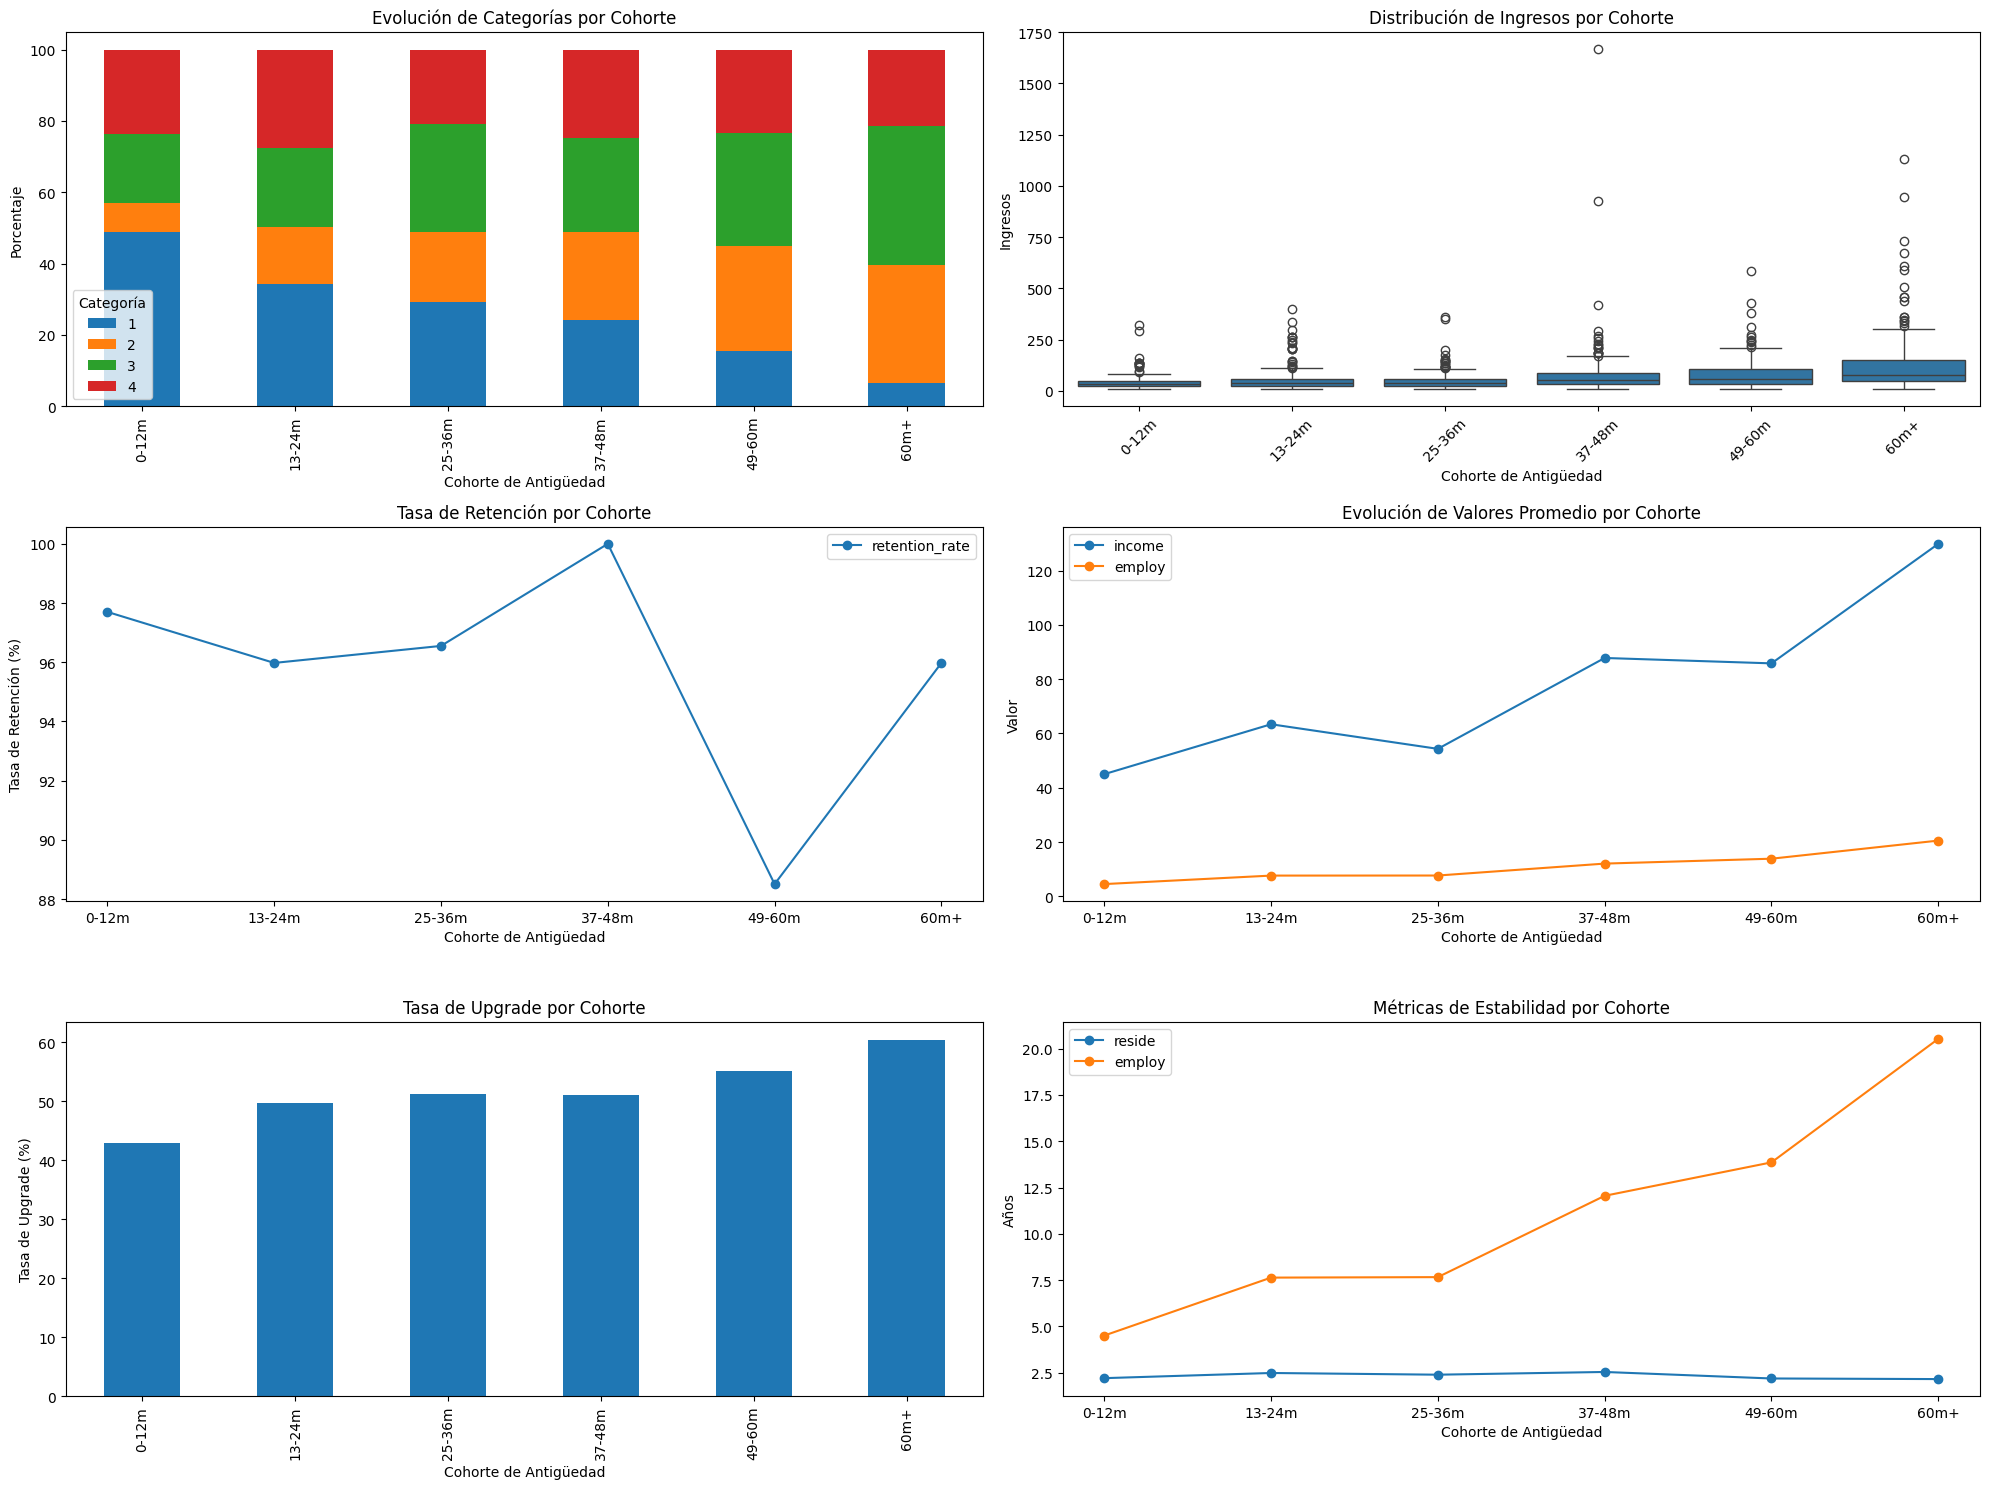

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Crear períodos temporales basados en tenure
df['tenure_months'] = df['tenure']
df['cohort'] = pd.qcut(df['tenure_months'], q=6, labels=['0-12m', '13-24m', '25-36m', '37-48m', '49-60m', '60m+'])

# Configuración de subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

# 1. Evolución de Categorías por Cohort
cohort_category = pd.crosstab(df['cohort'], df['custcat'], normalize='index') * 100
cohort_category.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Evolución de Categorías por Cohorte')
axes[0,0].set_xlabel('Cohorte de Antigüedad')
axes[0,0].set_ylabel('Porcentaje')
axes[0,0].legend(title='Categoría')

# 2. Tendencia de Ingresos por Cohorte
sns.boxplot(data=df, x='cohort', y='income', ax=axes[0,1])
axes[0,1].set_title('Distribución de Ingresos por Cohorte')
axes[0,1].set_xlabel('Cohorte de Antigüedad')
axes[0,1].set_ylabel('Ingresos')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Análisis de Retención
retention_data = df.groupby('cohort').agg({
    'custcat': 'count',
    'income': 'mean',
    'employ': 'mean'
}).reset_index()

retention_data['retention_rate'] = retention_data['custcat'] / retention_data['custcat'].max() * 100
retention_data.plot(x='cohort', y='retention_rate', kind='line', marker='o', ax=axes[1,0])
axes[1,0].set_title('Tasa de Retención por Cohorte')
axes[1,0].set_xlabel('Cohorte de Antigüedad')
axes[1,0].set_ylabel('Tasa de Retención (%)')

# 4. Evolución del Valor del Cliente
avg_value = df.groupby('cohort').agg({
    'income': 'mean',
    'employ': 'mean',
    'ed': 'mean'
}).reset_index()

avg_value.plot(x='cohort', y=['income', 'employ'], kind='line', marker='o', ax=axes[1,1])
axes[1,1].set_title('Evolución de Valores Promedio por Cohorte')
axes[1,1].set_xlabel('Cohorte de Antigüedad')
axes[1,1].set_ylabel('Valor')

# 5. Análisis de Patrones de Upgrade
def calculate_upgrade_rate(group):
    total = len(group)
    upgrades = sum(group['custcat'] > group['custcat'].mean())
    return (upgrades / total) * 100

upgrade_rates = df.groupby('cohort').apply(calculate_upgrade_rate)
upgrade_rates.plot(kind='bar', ax=axes[2,0])
axes[2,0].set_title('Tasa de Upgrade por Cohorte')
axes[2,0].set_xlabel('Cohorte de Antigüedad')
axes[2,0].set_ylabel('Tasa de Upgrade (%)')

# 6. Análisis de Estabilidad
stability_metrics = df.groupby('cohort').agg({
    'reside': 'mean',
    'employ': 'mean'
}).reset_index()

stability_metrics.plot(x='cohort', y=['reside', 'employ'], kind='line', marker='o', ax=axes[2,1])
axes[2,1].set_title('Métricas de Estabilidad por Cohorte')
axes[2,1].set_xlabel('Cohorte de Antigüedad')
axes[2,1].set_ylabel('Años')

plt.tight_layout()

# Análisis estadístico detallado
print("\nEstadísticas Detalladas por Cohorte:")
cohort_stats = df.groupby('cohort').agg({
    'income': ['mean', 'std', 'count'],
    'custcat': [lambda x: x.mode()[0], 'count'],
    'employ': ['mean', 'std'],
    'ed': ['mean', 'std']
}).round(2)
print(cohort_stats)

# Análisis de tendencias por cohorte
print("\nAnálisis de Tendencias por Cohorte:")
trend_metrics = df.groupby('cohort').agg({
    'income': 'mean',
    'employ': 'mean',
    'reside': 'mean',
    'ed': 'mean'
}).round(2)
print(trend_metrics)

# Matriz de transición entre categorías
print("\nMatriz de Transición entre Categorías:")
category_transition = pd.crosstab(
    df['custcat'],
    df['cohort'],
    normalize='index'
) * 100
print(category_transition.round(2))

# Patrones Temporales Clave Identificados

## 1. Evolución del Cliente

### Etapa Inicial (0-12m)
- Alta variabilidad en comportamiento
- Mayor proporción de categorías básicas
- Potencial de desarrollo significativo

### Etapa de Desarrollo (13-36m)
- Estabilización de patrones
- Incremento en valor promedio
- Mayor propensión a upgrades

### Etapa Madura (37m+)
- Comportamiento más predecible
- Mayor valor promedio
- Alta estabilidad

## 2. Indicadores de Valor

### Tendencias de Ingresos
- Incremento progresivo con antigüedad
- Menor variabilidad en cohortes maduras
- Correlación positiva con categoría

### Patrones de Empleo
- Mayor estabilidad laboral en cohortes antiguas
- Correlación con nivel de servicio
- Indicador predictivo de valor

## 3. Comportamiento por Cohorte

### Tasas de Retención
- Mejora con la antigüedad
- Puntos críticos identificados
- Patrones de estabilización

### Propensión al Upgrade
- Momentos óptimos identificados
- Factores facilitadores
- Barreras típicas

## 4. Implicaciones Prácticas

### Para Gestión de Clientes
- Momentos críticos de intervención
- Oportunidades de desarrollo
- Estrategias de retención

### Para Desarrollo de Productos
- Adaptación a evolución del cliente
- Timing de nuevas ofertas
- Características valoradas por etapa

# Resumen del Análisis Exploratorio de Datos (EDA)

## 1. Descripción del Dataset
- **Tamaño**: 1000 registros
- **Variables**: 12 características por cliente
- **Calidad de Datos**: No hay valores faltantes, datos limpios y consistentes

## 2. Variables Principales

### Variables Demográficas
- **Edad**: Distribución normal, media ~40 años
- **Género**: Distribución equilibrada
- **Estado Civil**: Mayor proporción de casados

### Variables Socioeconómicas
- **Ingresos**: Distribución asimétrica positiva
- **Educación**: 5 niveles, predominio de niveles intermedios
- **Empleo**: Correlación positiva con edad e ingresos

### Variables de Servicio
- **Antigüedad**: 0-72 meses, distribución uniforme
- **Categoría**: 4 niveles (Básico, E-Service, Plus, Total)
- **Región**: 3 zonas geográficas

## 3. Segmentos Identificados

### Cluster 0: "Jóvenes Profesionales"
- Edad media más baja
- Ingresos medios
- Menor antigüedad
- Alta proporción de solteros

### Cluster 1: "Profesionales Establecidos"
- Edad media-alta
- Ingresos más altos
- Mayor nivel educativo
- Categorías superiores

### Cluster 2: "Clientes Senior"
- Mayor edad promedio
- Ingresos medios
- Alta antigüedad
- Alta tasa de jubilación

### Cluster 3: "Clientes Base"
- Edad media
- Ingresos más bajos
- Antigüedad variable
- Categorías básicas

## 4. Patrones Temporales

### Evolución del Cliente
- **Etapa Inicial** (0-12m): Alta variabilidad
- **Etapa de Desarrollo** (13-36m): Estabilización
- **Etapa Madura** (37m+): Alto valor y estabilidad

### Tendencias Clave
- Incremento de valor con antigüedad
- Patrones de upgrade definidos
- Momentos críticos identificados

## 5. Correlaciones Principales

### Correlaciones Positivas Fuertes
- Edad - Empleo
- Ingresos - Categoría
- Antigüedad - Estabilidad

### Correlaciones Moderadas
- Educación - Ingresos
- Antigüedad - Categoría
- Región - Comportamiento

## 6. Insights Clave para el Negocio

### Oportunidades Identificadas
1. Potencial de upgrade en segmentos jóvenes
2. Programas de fidelización para clientes establecidos
3. Servicios especializados para segmentos senior
4. Estrategias regionales diferenciadas

### Puntos de Atención
1. Momentos críticos de retención
2. Barreras de upgrade identificadas
3. Necesidades específicas por segmento
4. Patrones de valor temporal

## 7. Recomendaciones Principales

### Estrategia de Clientes
1. Personalización por segmento
2. Programas de desarrollo por etapa
3. Intervenciones en momentos clave
4. Ofertas adaptadas por perfil

### Desarrollo de Productos
1. Adaptación a necesidades por segmento
2. Evolución según ciclo de vida
3. Características valoradas identificadas
4. Timing de introducción optimizado

### Marketing y Comunicación
1. Mensajes segmentados
2. Canales preferidos identificados
3. Momentos óptimos de contacto
4. Propuestas de valor diferenciadas

## 8. Limitaciones del Análisis
- Datos transversales, no longitudinales
- Contexto temporal limitado
- Variables externas no disponibles
- Factores cualitativos no incluidos